In [22]:
import numpy as np
import matplotlib.pyplot as plt


In [23]:
def derive(func, input_: np.ndarray, delta: float = 0.001) -> np.ndarray:
    '''
    Ermittelt die Ableitung einer Funktion "func" für jedes Element im Array "input_".
    '''
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)


In [24]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
sqare = lambda x: np.power(x,2)

# def sigmoid(x):
#   return 1 / (1 + np.exp(-x))

# def sqared(x):
#    return lambda x: np.power(x,2)        




In [25]:
chain = [sqare,sigmoid]
chain

x = np.array([-3,-2,-1,0,1,2,3])
y = sqare(x)

print(derive(sqare, x))
print(derive(sigmoid, x))

print(derive(chain[0], x))

[-6. -4. -2.  0.  2.  4.  6.]
[0.04517667 0.10499359 0.19661193 0.24999998 0.19661193 0.10499359
 0.04517667]
[-6. -4. -2.  0.  2.  4.  6.]


In [38]:
def chain_deriv(chain, input_range : np.ndarray) -> np.ndarray:
    '''
    Verwendert die  Kettenregel:
    f2(f1(x)) = f2'(f1(x)) * f'(x)
    '''

    assert len(chain) == 2, \
        "This function benötigt zwei Funktionen"
    assert input_range.ndim == 1, \
        "input muss 1 dimensional sein"    
    f1 = chain[0]
    f2 = chain[1]

    f1_of_x = f1(input_range)
    f_of_x = f2(f1(input_range))

    # f1'(x)     
    df1dx = derive(f1, input_range)

    # f2'(u)  u = f1
    
    # df2du = derive(f2, f1(input_range))
    df2du = derive(f2, f1_of_x)

    return f_of_x, df1dx * df2du


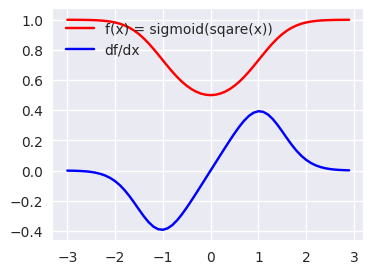

In [39]:
x = np.arange(-3,3,0.1)

chain_1 = [sqare,sigmoid]
chain_2 = [sigmoid,sqare]

y1, y2 = chain_deriv(chain_1, x)

plt.figure(figsize=(4, 3))
plt.plot(x,y1, '-r', label='f(x) = sigmoid(sqare(x))')
plt.plot(x,y2, '-b', label='df/dx')
plt.legend(loc='upper left')
# plt.style.use('seaborn-v0_8')
# plt.legend(loc='best')
plt.grid(True)
plt.show()
# y = chain_deriv(chain_2, x)
# plt.plot(x,y, c='r')


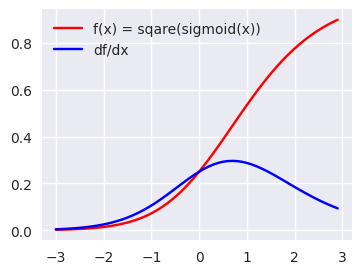

In [28]:
y1, y2 = chain_deriv(chain_2, x)

plt.figure(figsize=(4, 3))
plt.plot(x,y1, '-r', label='f(x) = sqare(sigmoid(x))')
plt.plot(x,y2, '-b', label='df/dx')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
